# Satellite Image Classification

In [ ]:
import pandas as pd
import os
data = pd.DataFrame(columns = ['image_path', 'label'])

labels ={'/content/drive/MyDrive/Interview Prep/Satellite Image ML AI/data/cloudy' : 'Cloudy',
         '/content/drive/MyDrive/Interview Prep/Satellite Image ML AI/data/desert' : 'Desert',
         '/content/drive/MyDrive/Interview Prep/Satellite Image ML AI/data/green_area' : 'Green_area',
         '/content/drive/MyDrive/Interview Prep/Satellite Image ML AI/data/water' : 'Water',

         }


In [ ]:
# for folder in labels:
#   for image_name in os.listdir(folder):
#     image_path = os.path.join(folder, image_name)
#     label = labels[folder]
#     data = data.append({'image_path':image_path, 'label': label }, ignore_index=True)



data_list = []  # Create an empty list to hold data dictionaries

for folder, label in labels.items():
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        # label = labels[folder]
        data_list.append({'image_path': image_path, 'label': label})

data = pd.concat([pd.DataFrame(data_dict, index=[0]) for data_dict in data_list], ignore_index=True)

# Now the 'data' DataFrame contains the image paths and labels


In [ ]:
data.to_csv('image_dataset.csv', index = True)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
df = pd.read_csv('image_dataset.csv')

In [193]:
df

,Unnamed: 0,image_path,label
0,0,/content/drive/MyDrive/Interview Prep/Satellit...,Cloudy
1,1,/content/drive/MyDrive/Interview Prep/Satellit...,Cloudy
2,2,/content/drive/MyDrive/Interview Prep/Satellit...,Cloudy
3,3,/content/drive/MyDrive/Interview Prep/Satellit...,Cloudy
4,4,/content/drive/MyDrive/Interview Prep/Satellit...,Cloudy
...,...,...,...
5626,5626,/content/drive/MyDrive/Interview Prep/Satellit...,Water
5627,5627,/content/drive/MyDrive/Interview Prep/Satellit...,Water
5628,5628,/content/drive/MyDrive/Interview Prep/Satellit...,Water
5629,5629,/content/drive/MyDrive/Interview Prep/Satellit...,Water


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Unnamed: 0', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Unnamed: 0', 'count()', 'label'], **{})
chart

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_diagram = ImageDataGenerator( rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                                   rotation_range=45, vertical_flip=True, fill_mode='nearest' )

test_diagram =ImageDataGenerator(rescale=1./255)

train_generator = train_diagram.flow_from_dataframe(dataframe=train_df, x_col='image_path', y_col='label', target_size=(255,255),
                                                  batch_size=32, class_mode='categorical' )

test_generator = test_diagram.flow_from_dataframe(dataframe=test_df, x_col='image_path', y_col='label', target_size=(255,255),
                                                  batch_size=32, class_mode='categorical')



Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


# Deep learning model

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= (255,255,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator, epochs=5, validation_data= test_generator )

<ipython-input-113-a318f826637c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data= test_generator )


Epoch 1/5
141/141 [==============================] - 1143s 8s/step - loss: 0.7168 - accuracy: 0.6323 - val_loss: 0.4575 - val_accuracy: 0.7968
Epoch 2/5
141/141 [==============================] - 654s 5s/step - loss: 0.4727 - accuracy: 0.8099 - val_loss: 0.4073 - val_accuracy: 0.8350
Epoch 3/5
141/141 [==============================] - 656s 5s/step - loss: 0.4506 - accuracy: 0.7853 - val_loss: 0.4436 - val_accuracy: 0.7524
Epoch 4/5
141/141 [==============================] - 654s 5s/step - loss: 0.4027 - accuracy: 0.8282 - val_loss: 0.3082 - val_accuracy: 0.8758
Epoch 5/5
141/141 [==============================] - 658s 5s/step - loss: 0.3524 - accuracy: 0.8586 - val_loss: 0.3193 - val_accuracy: 0.8625


In [ ]:
num_sample = test_df.shape[0]
num_sample

1127

In [ ]:
score = model.evaluate(test_generator, steps=num_sample//32+1)

36/36 [==============================] - 38s 1s/step - loss: 0.3193 - accuracy: 0.8625


In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x781cecc7d390>>

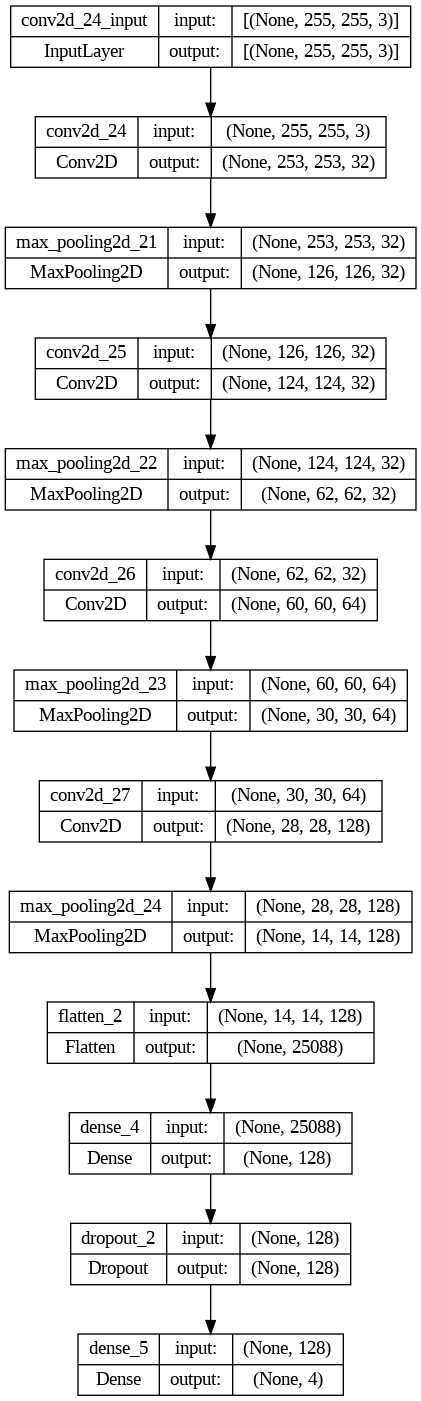

In [ ]:
from keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='cnn_model.png', show_shapes= True, show_layer_names=True )
display(Image.open('cnn_model.png'))

# loss and accuracy visualization

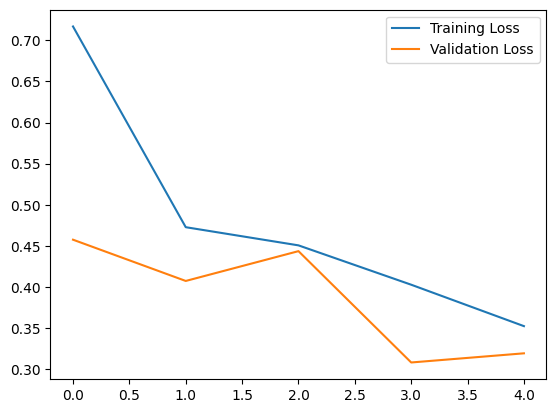

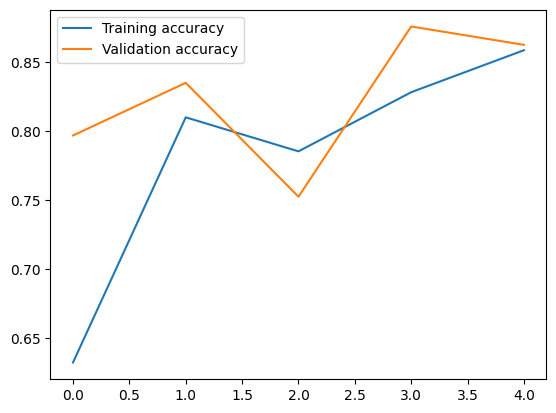

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#plot the loss :
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')

plt.legend()
plt.show()
plt.savefig('LossVal_loss')


#plot the accuracy:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')

plt.legend()
plt.show()
plt.savefig('AccuracyVal_Accuracy')



# saving the models

In [ ]:
from keras.models import load_model
model.save('Model.h5')
model= load_model('Model.h5')

In [154]:
import numpy as np

from keras.utils import img_to_array
from PIL import Image

class_names = ['Cloudy', 'Desert', 'Green_area', 'Water']

In [155]:
from keras.utils.image_utils import load_img

img = load_img("/content/desert.png", target_size=(255,255))

In [156]:
img_array = img_to_array(img)
img_array

array([[[255., 235., 209.],
        [255., 232., 203.],
        [255., 232., 203.],
        ...,
        [255., 240., 218.],
        [255., 240., 218.],
        [255., 240., 218.]],

       [[255., 232., 203.],
        [255., 235., 209.],
        [255., 235., 209.],
        ...,
        [255., 240., 218.],
        [255., 240., 218.],
        [255., 240., 218.]],

       [[255., 235., 209.],
        [255., 232., 203.],
        [255., 235., 209.],
        ...,
        [255., 240., 218.],
        [255., 240., 218.],
        [255., 243., 224.]],

       ...,

       [[ 72.,  44.,  26.],
        [ 72.,  44.,  26.],
        [ 72.,  44.,  26.],
        ...,
        [115.,  64.,  37.],
        [115.,  64.,  37.],
        [118.,  69.,  36.]],

       [[ 72.,  44.,  26.],
        [ 72.,  44.,  26.],
        [ 72.,  44.,  26.],
        ...,
        [132.,  76.,  44.],
        [115.,  64.,  37.],
        [109.,  65.,  33.]],

       [[ 72.,  44.,  26.],
        [ 72.,  44.,  26.],
        [ 72.,  

In [157]:
img_array.shape

(255, 255, 3)

In [158]:
img_array = img_array /255.0
img_array

array([[[1.        , 0.92156863, 0.81960785],
        [1.        , 0.9098039 , 0.79607844],
        [1.        , 0.9098039 , 0.79607844],
        ...,
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9411765 , 0.85490197]],

       [[1.        , 0.9098039 , 0.79607844],
        [1.        , 0.92156863, 0.81960785],
        [1.        , 0.92156863, 0.81960785],
        ...,
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9411765 , 0.85490197]],

       [[1.        , 0.92156863, 0.81960785],
        [1.        , 0.9098039 , 0.79607844],
        [1.        , 0.92156863, 0.81960785],
        ...,
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9411765 , 0.85490197],
        [1.        , 0.9529412 , 0.8784314 ]],

       ...,

       [[0.28235295, 0.17254902, 0.10196079],
        [0.28235295, 0.17254902, 0.10196079],
        [0.28235295, 0

In [159]:
import numpy as np
img_array = np.reshape(img_array, (1,255,255,3))

# Using Our Model For Predictions

In [160]:
predictions = model.predict(img_array)

1/1 [==============================] - 0s 53ms/step


In [161]:
class_index = np.argmax(predictions[0])

predicted_label = class_names[class_index]
print("The image is predicted to be '{}'. " .format(predicted_label))

The image is predicted to be 'Desert'. 


In [162]:
from sklearn.metrics import confusion_matrix
predictions= model.predict_generator(test_generator)

<ipython-input-162-7dfc48111a78>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions= model.predict_generator(test_generator)


In [163]:
predictions

array([[3.9965700e-05, 9.9996001e-01, 0.0000000e+00, 0.0000000e+00],
       [3.6070407e-03, 9.9639291e-01, 1.3277211e-25, 9.3816198e-24],
       [1.1652729e-05, 3.8131837e-08, 5.5289841e-03, 9.9445921e-01],
       ...,
       [5.5258954e-04, 3.8300836e-06, 6.2235463e-01, 3.7708893e-01],
       [1.9061721e-05, 9.9998093e-01, 0.0000000e+00, 0.0000000e+00],
       [2.4588659e-04, 1.5771989e-06, 7.2081465e-01, 2.7893791e-01]],
      dtype=float32)

In [164]:
actual_label = test_generator.classes
predicted_label = np.argmax(predictions, axis =1)

# actual_label
predicted_label

array([1, 1, 3, ..., 2, 1, 2])

In [165]:
cm = confusion_matrix(actual_label, predicted_label)
cm

array([[96, 73, 97, 62],
       [58, 57, 72, 40],
       [66, 74, 86, 58],
       [69, 71, 87, 61]])

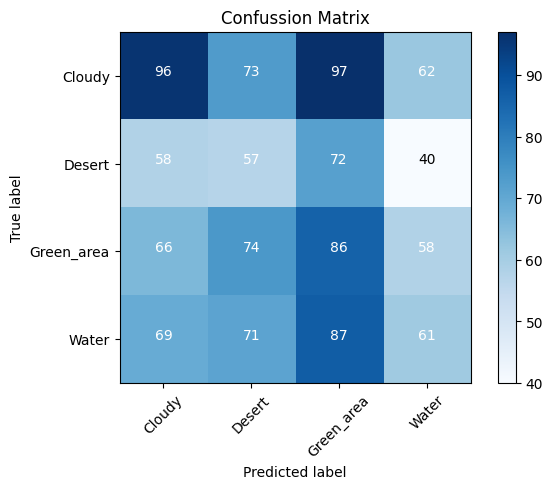

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

#confussion matrix :
plt.imshow(cm , cmap= plt.cm.Blues)
plt.title("Confussion Matrix")
plt.colorbar()

tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names, rotatation = 45)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names,)

threshold = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1]) ):
  plt.text(j, i, cm[i, j], horizontalalignment = "center",
  # plt.text(i,j, cm[i, j], horizontalalignment="center",
  color = 'white' if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
